In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#### An underdamped pendulum decays in amplitude exponentially​  

\begin{align} \large \theta_{max}(t) = \theta_{0} e^{\frac{\eta t}{2m}}  \end{align}

##### $ \eta $ : air drag constant ($ kg \cdot s^{-1} $)

C:\Users\USER\AppData\Local\Temp\ipykernel_18340\904231966.py:19: RuntimeWarning: overflow encountered in exp
  return theta0*np.exp(-eta*t/(2*M))


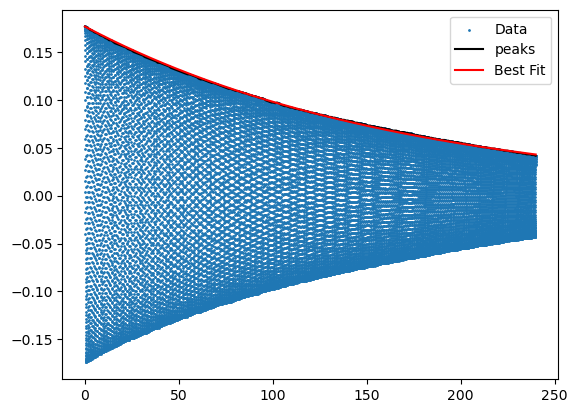

Air Drag Constant is 0.00117763


In [4]:
R = 0.01        # Radius of bob (m)
L = 0.2865      # Length of string (m)
M = 0.100       # Mass of bob (kg)

df = pd.read_csv("C0003_trunc.csv")
t = df['t'].to_numpy()
x = df['x'].to_numpy()
x0 = np.mean(x)
theta = np.arcsin((x-x0)/(L+R))

t -= t[0]

peaks, _ = find_peaks(theta)
tPeaks, thetaPeaks = t[peaks], theta[peaks]

theta0 = thetaPeaks[0]

def func(t, eta):
    return theta0*np.exp(-eta*t/(2*M))

popt, pcov = curve_fit(func, tPeaks, thetaPeaks)

plt.scatter(t, theta, s=1, label='Data')
plt.plot(tPeaks, thetaPeaks, color='k', label='peaks')
plt.savefig("theta-t_data.svg", transparent=True)
plt.plot(tPeaks, func(tPeaks, *popt), color='r', label='Best Fit')
plt.legend()
plt.show()

print(f"Air Drag Constant is {np.round(popt[0], 8)}")

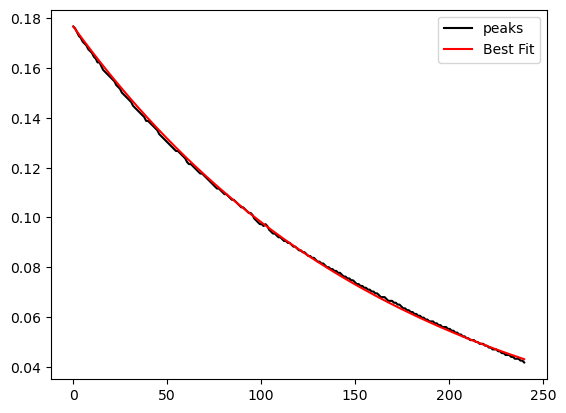

In [5]:
plt.plot(tPeaks, thetaPeaks, color='k', label='peaks')
plt.savefig("theta-max_data.svg", transparent=True)
plt.plot(tPeaks, func(tPeaks, *popt), color='r', label='Best Fit')
plt.legend()
plt.savefig("theta-max-t_fit.svg", transparent=True)
plt.show()